<a href="https://colab.research.google.com/github/rzavarce/Leaflet.Elevation/blob/master/Machine_Learning_Regresio%CC%81n_mu%CC%81ltiple%2C_regularizacio%CC%81n_y_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Predicción del precio de viviendas con regresión simple y múltiple

# Descarga de datos con los que trabajaremos

In [1]:
!git clone https://github.com/marcos-garcia/machine-learning-curso.git

Cloning into 'machine-learning-curso'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 65 (delta 15), reused 56 (delta 6), pack-reused 0
Unpacking objects: 100% (65/65), done.


#Importamos las librerías que se van a utilizar
* matplotlib
* numpy
* sklearn
* pandas
* seaborn

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import math

#Cargando datos de propiedades

El dataset contiene ventas de propiedades en King Country, una región donde se encuentra la ciudad de Seattle, WA

In [0]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
ventas=pd.read_csv('machine-learning-curso/regresion/simple/data/kc_house_data.csv.zip', sep=',',header=0, dtype=dtype_dict, compression='zip')

In [0]:
ventas.head()
ventas.info()
ventas.describe()
ventas.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null object
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null float64
sqft_lot         21613 non-null int64
floors           21613 non-null object
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null object
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null float64
sqft_lot15       21613 non-null float64
dtypes: float64(8), int64(9), object(4)
memory usage: 3.5+ MB


Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [0]:
ventas.head()

NameError: ignored

In [0]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null object
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null float64
sqft_lot         21613 non-null int64
floors           21613 non-null object
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null object
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null float64
sqft_lot15       21613 non-null float64
dtypes: float64(8), int64(9), object(4)
memory usage: 3.5+ MB


In [0]:
ventas.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
ventas.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

#Explorando los datos de ventas de propiedades

In [0]:
numerical = [
  'bathrooms', 'sqft_above', 'sqft_living15', 'price', 'bedrooms', 'long', 'sqft_lot15', 'floors', 'sqft_living', 'sqft_basement'
]
categorical = [
  'waterfront', 'condition', 'view'
]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6496b576d0>,
      dtype=object)

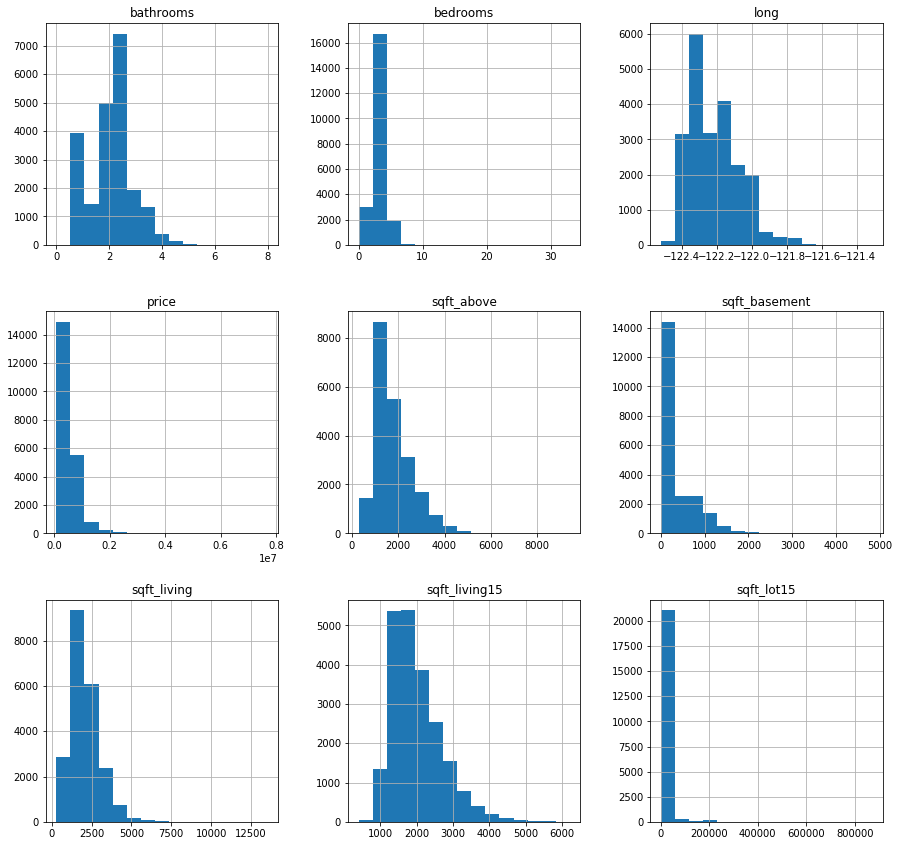

In [0]:
ventas[numerical].hist(bins=15, figsize=(15, 20), layout=(4, 3))

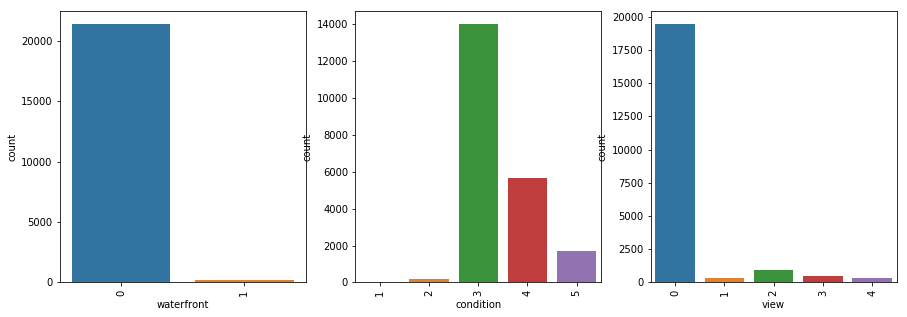

In [0]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(ventas[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

El precio de las propiedades está correlado con el número de metros cuadrados.

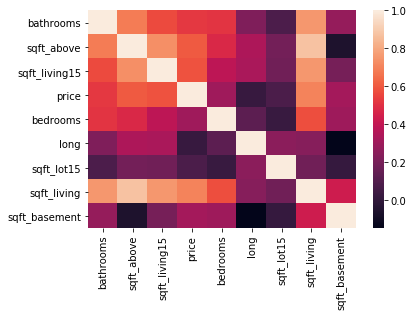

In [0]:
sns.heatmap(ventas[numerical].corr())

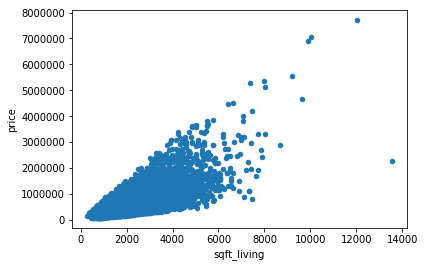

In [0]:
ventas.plot.scatter(x='sqft_living',y='price')

#Crear un modelo de regresión simple del precio en función del número de metros cuadrados

Dividimos los datos en entrenamiento y test.
Usaremos los dataset que ya vienen divididos de manera que todo el mundo que corra este notebook obtenga los mismos resultados.
En la práctica, se debería utilizar un valor aleatorio.

In [0]:
prediction_var = ['sqft_living']
criterion_var = 'price'

Podemos dividir los datos de forma aleatoria con la función train_test_split. La variable random_state establece la semilla aleatoria: si damos un valor a dicha semilla obtendremos los mismos resultados de la extracción aleatoria y el experimento podrá ser reproducible de nuevo

In [0]:
X_train, X_test, y_train, y_test = train_test_split(ventas[prediction_var], ventas[criterion_var], test_size=0.2, random_state=1)

In [0]:
ventas_train, ventas_test = train_test_split(ventas, test_size=0.2, random_state=0)

Aun así, lo que utilizaremos será una disección ya realizada, de manera que nos aseguremos que la repartición es la misma

In [0]:
ventas_train=pd.read_csv('machine-learning-curso/regresion/simple/data/kc_house_train_data.csv.zip', sep=',',header=0, dtype=dtype_dict, compression='zip')
ventas_test=pd.read_csv('machine-learning-curso/regresion/simple/data/kc_house_test_data.csv.zip', sep=',',header=0, dtype=dtype_dict, compression='zip')

In [0]:
X_train = ventas_train[prediction_var].values.reshape(-1,1)
X_test = ventas_test[prediction_var].values.reshape(-1,1)
y_train = ventas_train[criterion_var].values.reshape(-1,1)
y_test = ventas_test[criterion_var].values.reshape(-1,1)

##Construir el modelo de regresión utilizando solamente el número de metros cuadrados como característica

In [0]:
sqft_model = linear_model.LinearRegression().fit(X_train,y_train)

In [0]:
sqft_model.score(X_test,y_test)

0.4872491184162604

In [0]:
cdf = pd.DataFrame(np.append(sqft_model.coef_,sqft_model.intercept_) , np.append(prediction_var,'(intercept)'), columns=['Coeficientes'])
print(cdf)

             Coeficientes
sqft_living    281.958840
(intercept) -47116.079073


#Evaluación del modelo

In [0]:
print y_test.mean()

543054.0430361788


In [0]:
ytest_pred = sqft_model.predict(X_test)

mse = mean_squared_error(y_test, ytest_pred, sample_weight=None, multioutput='uniform_average')
math.sqrt(mse)

255191.04978195883

RMSE es aproximadamente \$255,191!

#Observamos qué pinta tienen las predicciones

In [0]:
plt.plot(ventas_test[prediction_var],ventas_test[criterion_var],'.',
        ventas_test[prediction_var],sqft_model.predict(X_test),'-')

Los puntos azules son los datos originales, la línea es la predicción del modelo de regresión simple.

#Explorando otras características en los datos

Para construir un modelo más elaborado, exploraremos más características de los datos

In [0]:
more_predict_vars = ['bathrooms', 'waterfront', 'sqft_above', 'sqft_living15', 'grade', 'yr_renovated', 'bedrooms', 'zipcode', 'long', 'sqft_lot15', 'sqft_living', 'floors', 'condition', 'lat', 'sqft_basement', 'yr_built', 'sqft_lot', 'view']


In [0]:
ventas[more_predict_vars].head()

In [0]:
corr_vars = np.append(more_predict_vars, criterion_var)
sns.heatmap(ventas[corr_vars].corr())

#Construcción de un modelo de regresión con más características

In [0]:

X_train2 = ventas_train[more_predict_vars]
X_test2 = ventas_test[more_predict_vars]
more_features_model = linear_model.LinearRegression().fit(X_train2.values,y_train)

In [0]:
more_features_model.score(X_test2.values,y_test)

In [0]:
ytest2_pred = more_features_model.predict(X_test2)

mse2 = mean_squared_error(y_test, ytest2_pred, sample_weight=None)
math.sqrt(mse2)

El RMSE ha bajado a 199.228€

In [0]:
cdf = pd.DataFrame(np.append(more_features_model.coef_,more_features_model.intercept_) , np.append(more_predict_vars,'(intercept)'), columns=['Coeficientes'])
print(cdf)

#Aplicación de los modelos aprendidos para predecir el precio de dos casas distintas

## La primera casa que usaremos se considera una vivienda "promedio" en Seattle


In [0]:
house1 = ventas[ventas['id']=='5309101200']

In [0]:
house1

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [0]:
print house1['price']

In [0]:
print sqft_model.predict(house1[prediction_var])

In [0]:
print more_features_model.predict(house1[more_predict_vars])

En este caso el modelo con más características da una peor predicción que el modelo más simple con una sola característica. Sin embargo, en promedio, el modelo con mejores características es mejor.

##Predicción de una segunda casa, más completa

Examinaremos ahora la predicción para una casa más completa.

In [0]:
house2 = ventas[ventas['id']=='1925069082']

In [0]:
house2

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [0]:
print sqft_model.predict(house2[prediction_var])

In [0]:
print more_features_model.predict(house2[more_predict_vars])

En este caso, el modelo con más características da una mejor predicción. Este comportamiento es el esperado aquí porque esta casa se diferencia más por las características que van más allá del número de metros cuadrados. Especialmente por el hecho de que es una casa con vistas al lago (waterfront).

# Regresión polinómica
Vamos a estudiar el efecto de una transformación polinómica en el caso de la predicción del precio de la vivienda en función de la superficie

Para ello, creamos primero una función auxiliar con la que construiremos dataframes con las potencias de una variable:

In [0]:
def polynomial_df(feature, degree):
  poly_df = pd.DataFrame()
  poly_df['power_1'] = feature
  if degree > 1:
    for power in range(2, degree+1):
      name = 'power_' + str(power)
      poly_df[name] = feature.apply(lambda x : x**power)
  return poly_df
  

In [0]:
polynomial_df(ventas['sqft_living'], 3).head()

Lo siguiente que vamos a hacer es crear una función que entrene un modelo e imprima los coeficientes.
Las funciones son muy útiles para organizar código y no tener que repetir las mismas sentencias una y otra vez.

In [0]:
from scipy import stats
def model_fit(X, X_labels, y, model_type = linear_model.LinearRegression(normalize=True)):
  model = model_type.fit(X,y)
  params = np.append(model.intercept_,model.coef_)
  predictions = model.predict(X)

  newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
  MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

  # Note if you don't want to use a DataFrame replace the two lines above with
  # newX = np.append(np.ones((len(X),1)), X, axis=1)
  # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

  var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
  sd_b = np.sqrt(var_b)
  ts_b = params/ sd_b

  p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

  sd_b = np.round(sd_b,3)
  ts_b = np.round(ts_b,3)
  p_values = np.round(p_values,3)
  params = np.round(params,4)

  myDF3 = pd.DataFrame()
  myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
  myDF3.index = np.append('(intercept)', X_labels)
  print(myDF3)
  #cdf = pd.DataFrame(np.append(model.coef_,model.intercept_) , np.append(X_labels,'(intercept)'), columns=['Coeficientes'])
  #print(cdf)
  return model



Ahora vamos a escribir una función que entrene un modelo con un conjunto de entrenamiento, ejecute la predicción en un conjunto de test, representando dicha predicción en un gráfico, que imprima el score con el conjunto de entrenamiento y de test y que devuelva el modelo entrenado

In [0]:
def model_train_and_test(train, test, feature, predictors, predicted, model_type = linear_model.LinearRegression(normalize=True)) :
  model = model_fit(train[predictors], predictors, train[predicted], model_type)
  sorted_df = test.sort_values([feature])
  plt.scatter(sorted_df[feature], sorted_df[predicted],color='g')
  plt.plot(sorted_df[feature], model.predict(sorted_df[predictors]),color='k')
  score_train = model.score(train[predictors], train[predicted])
  score_test = model.score(test[predictors], test[predicted])
  print("Score train = "+ str(score_train))
  print("Score test = "+ str(score_test))
  rms_train = math.sqrt(mean_squared_error(train[predicted], model.predict(train[predictors])))
  rms_test = math.sqrt(mean_squared_error(test[predicted], model.predict(test[predictors])))
  print("RMSE train = "+ str(rms_train))
  print("RMSE test = "+ str(rms_test))
  eval_d = {'Score Train' : score_train, 'Score Test' : score_test, 'RMSE train' : rms_train, 'RMSE test' : rms_test}
  plt.show()
  return model, eval_d

In [0]:
eval_df = pd.DataFrame()
for pow in range(1, 30):
  print("Pow: "+str(pow))
  df_train_power = polynomial_df(ventas_train['sqft_living'], pow)
  df_test_power = polynomial_df(ventas_test['sqft_living'], pow)
  train_ds = pd.concat([df_train_power, ventas_train], axis=1)
  test_ds = pd.concat([df_test_power, ventas_test], axis=1)
  mod, eval_d = model_train_and_test(train_ds, test_ds, 'sqft_living', df_train_power.columns, 'price')
  eval_df = eval_df.append(eval_d, ignore_index=True)

In [0]:
eval_df.index = range(1, 30)

In [0]:
plt.plot(eval_df['RMSE test'])
plt.plot(eval_df['RMSE train'])
plt.show()

In [0]:
plt.plot(eval_df['Score Train'])
plt.plot(eval_df['Score Test'])
plt.show()

#Añadiendo complejidad a la regresión múltiple
En este apartado vamos a analizar el efecto de ir añadiendo poco a poco más variables predictoras al modelo

In [0]:
predictor_vars = ['bathrooms', 'waterfront', 'sqft_above', 'sqft_living', 'grade', 'yr_renovated', 'bedrooms']

Al igual que en la regresión polinómica, correremos el modelo varias veces. En cada vez le vamos añadiendo una variable más al modelo, para ver su evolución a medida que aumenta la complejidad


In [0]:
#@title Default title text
eval_df = pd.DataFrame()
predictors = []
for var in predictor_vars:
  predictors.append(var)
  print("Vars: "+str(predictors))
  mod, eval_d = model_train_and_test(ventas_train, ventas_test, 'sqft_living', predictors, 'price')
  eval_df = eval_df.append(eval_d, ignore_index=True)

In [0]:
plt.plot(eval_df['RMSE test'])
plt.plot(eval_df['RMSE train'])
plt.show()

In [0]:
plt.plot(eval_df['Score Train'])
plt.plot(eval_df['Score Test'])
plt.show()

#Observando el overfitting en un modelo complejo
Vamos a entrenar ahora dos modelos de regresión, simple y múltiple, pero cada uno con distintos conjuntos de entrenamiento

In [0]:
train_set_aux_1, train_set_aux_2 = train_test_split(ventas_train, test_size=0.5, random_state=0)
train_set_1, train_set_2 = train_test_split(train_set_aux_1, test_size=0.5, random_state=0)
train_set_3, train_set_4 = train_test_split(train_set_aux_2, test_size=0.5, random_state=0)


## Modelo simple

In [0]:
mod_rs1, eval_rs1 = model_train_and_test(train_set_1, ventas_test, 'sqft_living', ['sqft_living'], 'price')
mod_rs2, eval_rs2 = model_train_and_test(train_set_2, ventas_test, 'sqft_living', ['sqft_living'], 'price')
mod_rs3, eval_rs3 = model_train_and_test(train_set_3, ventas_test, 'sqft_living', ['sqft_living'], 'price')
mod_rs4, eval_rs4 = model_train_and_test(train_set_4, ventas_test, 'sqft_living', ['sqft_living'], 'price')

Podemos observar que el coeficiente que se extrae no varía drásticamente cuando utilizamos un set diferente de datos, por lo que la varianza no es muy grande.

##Modelo complejo

In [0]:
pow = 5
vars = predictor_vars
pdf1 = polynomial_df(train_set_1['sqft_living'], pow)
pdf2 = polynomial_df(train_set_2['sqft_living'], pow)
pdf3 = polynomial_df(train_set_3['sqft_living'], pow)
pdf4 = polynomial_df(train_set_4['sqft_living'], pow)
pdftest = polynomial_df(ventas_test['sqft_living'], pow)
train_set_complex_1 = pd.concat([pdf1, train_set_1], axis=1)
train_set_complex_2 = pd.concat([pdf2, train_set_2], axis=1)
train_set_complex_3 = pd.concat([pdf3, train_set_3], axis=1)
train_set_complex_4 = pd.concat([pdf4, train_set_4], axis=1)
ventas_set_complex = pd.concat([pdftest, ventas_test], axis=1)
vars = vars + list(pdf1.columns)
vars.remove('sqft_living')
mod_rm1, eval_rs1 = model_train_and_test(train_set_complex_1, ventas_set_complex, 'sqft_living', vars, 'price')
mod_rm2, eval_rs2 = model_train_and_test(train_set_complex_2, ventas_set_complex, 'sqft_living', vars, 'price')
mod_rm3, eval_rs3 = model_train_and_test(train_set_complex_3, ventas_set_complex, 'sqft_living', vars, 'price')
mod_rm4, eval_rs4 = model_train_and_test(train_set_complex_4, ventas_set_complex, 'sqft_living', vars, 'price')

Con diferente conjunto de datos vemos que un modelo más complejo tiene una varianza más alta, nos da resultados completamente diferentes. Estamos ante un caso de sobreajuste o overfitting

# Añadiendo regularización al modelo
A continuación vamos a entrenar modelos complejos utilizando Ridge regression, con el fin de ver el efecto de la regularización

In [0]:
pow = 3
ridge_lambda = 2
vars = predictor_vars
pdf1 = polynomial_df(train_set_1['sqft_living'], pow)
pdf2 = polynomial_df(train_set_2['sqft_living'], pow)
pdf3 = polynomial_df(train_set_3['sqft_living'], pow)
pdf4 = polynomial_df(train_set_4['sqft_living'], pow)
pdftest = polynomial_df(ventas_test['sqft_living'], pow)
train_set_complex_1 = pd.concat([pdf1, train_set_1], axis=1)
train_set_complex_2 = pd.concat([pdf2, train_set_2], axis=1)
train_set_complex_3 = pd.concat([pdf3, train_set_3], axis=1)
train_set_complex_4 = pd.concat([pdf4, train_set_4], axis=1)
ventas_set_complex = pd.concat([pdftest, ventas_test], axis=1)
vars = vars + list(pdf1.columns)
vars.remove('sqft_living')
mod_rm1, eval_rs1 = model_train_and_test(train_set_complex_1, ventas_set_complex, 'sqft_living', vars, 'price', model_type = linear_model.Ridge(ridge_lambda, normalize=True))
mod_rm2, eval_rs2 = model_train_and_test(train_set_complex_2, ventas_set_complex, 'sqft_living', vars, 'price', model_type = linear_model.Ridge(ridge_lambda, normalize=True))
mod_rm3, eval_rs3 = model_train_and_test(train_set_complex_3, ventas_set_complex, 'sqft_living', vars, 'price', model_type = linear_model.Ridge(ridge_lambda, normalize=True))
mod_rm4, eval_rs4 = model_train_and_test(train_set_complex_4, ventas_set_complex, 'sqft_living', vars, 'price', model_type = linear_model.Ridge(ridge_lambda, normalize=True))

#Train, Test y Validación
Ejercicio: a continuación vamos a intentar obtener el mejor modelo posible de entre un conjunto de configuraciones que queramos probar.

Este conjunto de configuraciónes será la combinación de:
- El polinomio de la variable sqft_living, de 1 a 20.
- El conjunto de variables que hemos utilizado en el ejemplo de regresión múltiple, añadiendo de 1 a 1 (sin el sqft_living, ya que estará como variable en el polinomio, 6 en total) dichas variables.
- El parámetro de regulación: Probaremos con 0, 1 y 2

En total estaremos probando 20x6x3=360 combinaciones diferentes de modelos.
Para seleccionar el modelo utilizaremos el conjunto de test y nos quedaremos con aquel que de menor error o RMSE
Finalmente mediremos el RMSE del modelo con el conjunto de validación.

## Paso 1: Separación de los datos de train, test y validación

In [0]:
train, aux = train_test_split(ventas, test_size=0.3, random_state=0)
test, validation = train_test_split(aux, test_size=0.3, random_state=0)

## Paso 2: Obtener un listado con todas las combinaciones de variables y de parámetro de regulación del ejercicio

In [0]:
vars = list(predictor_vars)
vars.remove('sqft_living')
vars

In [0]:
configs = []
for reg in range(0,3):
  powers = []
  for power in range(1, 21):
    powers.append('power_'+str(power))
    predictors = list(vars) + list(powers)
    configs.append({'reg' : reg, 'predictors' : predictors})
configs
    

## Paso 3: Entrenar todos los modelos

In [0]:
pdftrain = polynomial_df(train['sqft_living'], 20)
pdftest = polynomial_df(test['sqft_living'], 20)
train_set_complex = pd.concat([pdftrain, train], axis=1)
test_set_complex = pd.concat([pdftest, test], axis=1)

models = []
for config in configs:
  model, ev = model_train_and_test(train_set_complex, test_set_complex, 'sqft_living', config['predictors'], 'price', model_type = linear_model.Ridge(config['reg'], normalize=True))
  models.append({'config': config, 'model' : model, 'train_err' : ev['RMSE train'], 'test_err' : ev['RMSE test']})
  
models_df = pd.DataFrame(models)

## Paso 4: Extraer el error de test de todos los modelos

In [0]:
models_df.sort_values('test_err').head()

## Paso 4: Determinar el modelo seleccionado y calcular el error con el conjunto de validación

In [0]:
best_model = models_df.sort_values('test_err').iloc[0]['model']
best_config = models_df.sort_values('test_err').iloc[0]['config']

In [0]:
best_config

In [0]:
pdfvalidation = polynomial_df(validation['sqft_living'], 20)
validation_set_complex = pd.concat([pdfvalidation, validation], axis=1)

best_model = models_df.sort_values('test_err').iloc[0]['model']
best_model.score(validation_set_complex[best_config['predictors']], validation_set_complex['price'])

In [0]:
validation_pred = best_model.predict(validation_set_complex[best_config['predictors']])
math.sqrt(mean_squared_error(validation_pred, validation_set_complex['price'], sample_weight=None))